In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import ICRS, SkyCoord
from typing import List

from sklearn.cluster import DBSCAN

In [58]:
RA: float = 11.7980
DEC: float = 85.2440

In [27]:
sources: pd.DataFrame = pd.read_csv('./data/ngc_188/1_deg.csv', index_col=None)

In [28]:
sources.head()

,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error
0,2300142011359619968,359.845926,85.187537,0.858780,0.263323,-2.147349,0.248731,2.277438,0.247771
1,2300142011360321664,359.852827,85.185653,1.234011,0.733703,-1.548571,0.756780,1.514820,0.700156
2,2300142762978486272,359.807062,85.196739,0.593997,0.129462,2.480786,0.126916,-2.629402,0.121067
3,2300142831697977088,359.979770,85.216151,0.587936,0.380755,-14.802001,0.360930,1.612288,0.371385
4,2300143042153556864,359.970793,85.225848,1.006705,0.014399,-1.131452,0.013781,-0.214863,0.014534


In [158]:
sources_clean.ra.min()

-0.3402727376509347

In [157]:
sources_clean.ra.max()

23.943850976543523

In [159]:
sources_clean: pd.DataFrame = sources[['ra', 'dec', 'parallax', 'pmra', 'pmdec']].dropna()
sky_coords: List[SkyCoord] = SkyCoord(ra=sources_clean['ra'].values,
                                      dec=sources_clean['dec'].values,
                                      unit=(u.deg, u.deg),
                                      frame=ICRS)

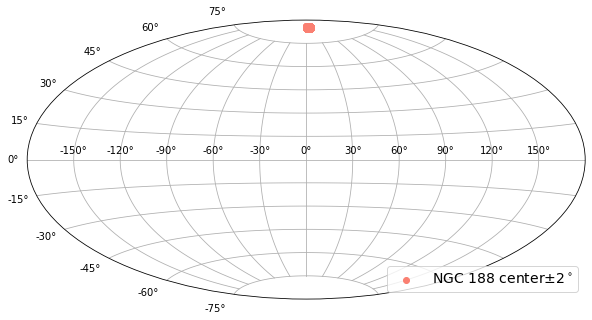

In [160]:
plt.figure(figsize=(10, 7))
plt.subplot(111, projection="aitoff")
plt.scatter(sky_coords.ra.radian, sky_coords.dec.radian, color='salmon', label=r'NGC 188 center$\pm 2^\circ$')
plt.grid()
plt.legend(loc='lower right', fontsize=14)

In [162]:
sources_clean.ra = sky_coords.ra.wrap_at(180 * u.deg)

In [163]:
clust = DBSCAN(eps=1.5, min_samples=200)
fit = clust.fit(sources_clean)

labels = fit.labels_
print(set(labels))

sources_clean['label'] = labels

{0, -1}


In [164]:
sources_clean.loc[sources_clean['label']==0].head()

,ra,dec,parallax,pmra,pmdec,label
56,14.943274,84.299976,1.703911,-2.177168,0.222508,0
106,13.496739,84.290157,0.674208,-2.083693,-1.031636,0
109,13.195966,84.286649,0.514619,-1.273176,-0.611222,0
115,14.361262,84.280557,0.657920,-2.002047,-2.184661,0
122,13.858937,84.303586,0.722605,-2.241424,-0.500441,0


In [165]:
sources_labeled = sources_clean[sources_clean['label']==0]
len(sources_labeled)

1643

In [166]:
sources_noise = sources_clean[sources_clean['label']==-1]
len(sources_noise)

13726

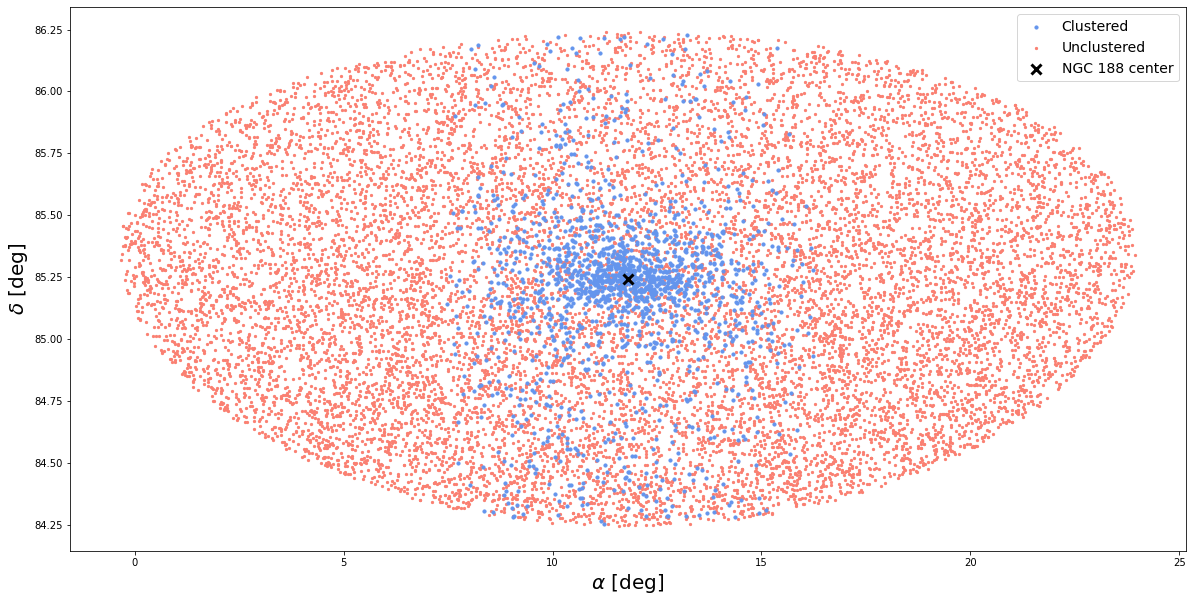

In [167]:
plt.figure(figsize=(20, 10))
plt.scatter(sources_labeled.ra, sources_labeled.dec, color='cornflowerblue', label='Clustered', zorder=2, s=10.)
plt.scatter(sources_noise.ra, sources_noise.dec, color='salmon', label='Unclustered', zorder=1, s=5.)
plt.scatter(RA, DEC, marker='x', linewidths=3., zorder=3, s=100, color='black', label='NGC 188 center');
plt.legend(fontsize=14);
plt.gca().set_xlabel('$\\alpha$ [deg]', fontsize=20);
plt.gca().set_ylabel('$\delta$ [deg]', fontsize=20);